In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
os.listdir('.')

['chembl_less_64_instances.csv',
 'chembl_more_256_instances.csv',
 'chembl_more_64_instances.csv',
 'chembl_less_128_instances.csv',
 'chembl_more_128_instances.csv',
 'chembl_less_256_instances.csv',
 'chembl_less_512_instances.csv',
 'chembl_assay_names.pickle',
 'chembl_assay_type_to_names.pickle',
 'chembl_assay_type_legend.pickle',
 'chembl_assays_skipped_404.pickle',
 'chembl_assay_name_to_type.pickle',
 'chembl_128_data',
 'chembl_1024_pretraining_test_tasks.csv',
 'chembl_more_512_instances.csv',
 'chembl_less_1024_instances.csv',
 'chembl_more_1024_instances.csv',
 'chembl_less_5000_instances.csv',
 'chembl_more_5000_instances.csv',
 'chembl_less_10000_instances.csv',
 'chembl_more_10000_instances.csv',
 'generate_pretraining_datasets.ipynb',
 'chembl_128_tasks.pickle',
 'README.txt',
 '.ipynb_checkpoints',
 'chembl_128_assay_type_to_names.pickle',
 'pickle_chembl_less_1024.py',
 'chembl_less_1024_all_smiles.pickle',
 'chembl_less_1024_all_targets.pickle',
 'chembl_less_1024_

In [6]:
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/chembl_1024_meta_train_task_split.pickle', 'rb') as handle:
    meta_train_tasks = np.array(pickle.load(handle))
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/chembl_1024_meta_val_task_split.pickle', 'rb') as handle:
    meta_val_tasks = np.array(pickle.load(handle))
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/chembl_1024_meta_test_task_split.pickle', 'rb') as handle:
    meta_test_tasks = np.array(pickle.load(handle))
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/chembl_1024_tasks.pickle', 'rb') as handle:
    chembl_tasks = pickle.load(handle)
with open('/home/apappu/thesis/molecule-metalearning2/molecule-metalearning/filtered_chembl/chembl_1024_assay_name_to_type.pickle', 'rb') as handle:
    assay_name_to_type = pickle.load(handle)

In [7]:
chembl_df = pd.read_csv('chembl_less_1024_more_128_645_tasks.csv')

In [8]:
meta_train_task_stats = {}
meta_val_task_stats = {}
meta_test_task_stats = {}

len(chembl_tasks)

645

In [9]:
chembl_df[chembl_df[example_task].notnull()][example_task].sum()

NameError: name 'example_task' is not defined

In [10]:
def generate_stats(task_idxs_list):
    task_stats_dict = {}
    prc_aucs = []
    for task_idx in task_idxs_list.nonzero()[0]:
        task_name = chembl_tasks[task_idx]
        num_positive = chembl_df[chembl_df[task_name].notnull()][task_name].sum()
        total = chembl_df[chembl_df[task_name].notnull()][task_name].count()
        baseline_prc_auc = 1. * num_positive/total
        prc_aucs.append(baseline_prc_auc)
        task_stats_dict[task_name] = {}
        task_stats_dict[task_name]['percent_positive'] = baseline_prc_auc
        task_stats_dict[task_name]['num_positive'] = num_positive
        task_stats_dict[task_name]['total_datapoints'] = total
    return prc_aucs, task_stats_dict

In [11]:
train_prc_aucs, train_stats = generate_stats(meta_train_tasks)
val_prc_aucs, val_stats = generate_stats(meta_val_tasks)
test_prc_aucs, test_stats = generate_stats(meta_test_tasks)

In [83]:
with open('meta_train_task_stats.pickle', 'wb') as handle:
    pickle.dump(train_stats, handle)
with open('meta_val_task_stats.pickle', 'wb') as handle:
    pickle.dump(val_stats, handle)
with open('meta_test_task_stats.pickle', 'wb') as handle:
    pickle.dump(test_stats, handle)

In [12]:
print("Train stats")

print('Average prc-auc: ', np.average(train_prc_aucs))
print('Median prc-auc: ', np.median(train_prc_aucs))
print("Num tasks: ", sum(meta_train_tasks))

print("Val stats")
print('Average prc-auc: ', np.average(val_prc_aucs))
print('Median prc-auc: ', np.median(val_prc_aucs))
print("Num tasks: ", sum(meta_val_tasks))


print("Test stats")
print('Average prc-auc', np.average(test_prc_aucs))
print('Median prc-auc', np.median(test_prc_aucs))
print("Num tasks: ", sum(meta_test_tasks))


Train stats
Average prc-auc:  0.45268396805960653
Median prc-auc:  0.4099616858237548
Num tasks:  599
Val stats
Average prc-auc:  0.2735904971244763
Median prc-auc:  0.11171878218596795
Num tasks:  20
Test stats
Average prc-auc 0.3793173027771485
Median prc-auc 0.28341488195502795
Num tasks:  26


Text(0.5, 0, 'Fraction of Positives in Task')

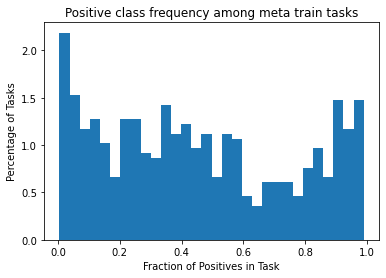

In [15]:
plt.hist(train_prc_aucs, density=True, bins=30)
plt.title("Positive class frequency among meta train tasks")
plt.ylabel('Percentage of Tasks')
plt.xlabel('Fraction of Positives in Task')

Text(0.5, 0, 'Fraction of Positives in Task')

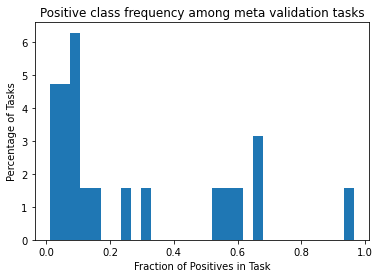

In [16]:
plt.hist(val_prc_aucs, density=True, bins=30)
plt.title("Positive class frequency among meta validation tasks")
plt.ylabel('Percentage of Tasks')
plt.xlabel('Fraction of Positives in Task')

Text(0.5, 0, 'Fraction of Positives in Task')

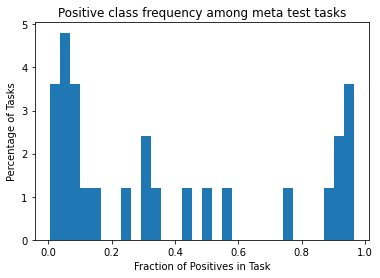

In [17]:
plt.hist(test_prc_aucs, density=True, bins=30)
plt.title("Positive class frequency among meta test tasks")
plt.ylabel('Percentage of Tasks')
plt.xlabel('Fraction of Positives in Task')

In [112]:
def count_task_splits(task_idxs_list):
    task_splits = defaultdict(int)
    for task_idx in np.nonzero(task_idxs_list)[0]:
        task_name = chembl_tasks[task_idx]
        assay_type = assay_name_to_type[task_name]
        task_splits[assay_type] += 1
    for key in task_splits.keys():
        print("Assay Type {} has {} tasks".format(key, task_splits[key]))

In [117]:
print("Meta train task split:")
count_task_splits(meta_train_tasks)
print("Meta val task split:")
count_task_splits(meta_val_tasks)
print("Meta test task split:")
count_task_splits(meta_test_tasks)

Meta train task split:
Assay Type F has 471 tasks
Assay Type B has 128 tasks
Meta val task split:
Assay Type F has 10 tasks
Assay Type B has 10 tasks
Meta test task split:
Assay Type F has 10 tasks
Assay Type B has 10 tasks
Assay Type U has 2 tasks
Assay Type T has 2 tasks
Assay Type A has 2 tasks


In [84]:
from sklearn.metrics import auc, precision_recall_curve

In [99]:
def sanity_check_prc_auc(preds, targets):
    baseline = sum(targets)/len(targets)
    precision, recall, _ = precision_recall_curve(targets, preds)
    print(precision, recall)
    prc_auc = auc(recall, precision)
    print('baseline: {}, prc-auc: {}'.format(baseline, prc_auc))

In [116]:
my_preds = [1,1, 1, 1, 1, 1, 1, 1, 1, 1]
targets = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

sanity_check(my_preds, targets)

[0.3 1. ] [1. 0.]
baseline: 0.3, prc-auc: 0.65


In [14]:
test_stats

{'CHEMBL1614170': {'percent_positive': 0.31135531135531136,
  'num_positive': 170.0,
  'total_datapoints': 546},
 'CHEMBL1614202': {'percent_positive': 0.9267515923566879,
  'num_positive': 291.0,
  'total_datapoints': 314},
 'CHEMBL1614359': {'percent_positive': 0.49743589743589745,
  'num_positive': 194.0,
  'total_datapoints': 390},
 'CHEMBL1738019': {'percent_positive': 0.7515151515151515,
  'num_positive': 124.0,
  'total_datapoints': 165},
 'CHEMBL1738021': {'percent_positive': 0.8913043478260869,
  'num_positive': 123.0,
  'total_datapoints': 138},
 'CHEMBL1738131': {'percent_positive': 0.3141025641025641,
  'num_positive': 147.0,
  'total_datapoints': 468},
 'CHEMBL1738202': {'percent_positive': 0.9652777777777778,
  'num_positive': 139.0,
  'total_datapoints': 144},
 'CHEMBL1794355': {'percent_positive': 0.9473684210526315,
  'num_positive': 288.0,
  'total_datapoints': 304},
 'CHEMBL1794358': {'percent_positive': 0.05855855855855856,
  'num_positive': 13.0,
  'total_datapoint